Q) Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Collection of data and description

In [2]:
f_data=pd.read_csv('C:\\Users\\DELL\\OneDrive\\Desktop\\DATA SCIENCE\\Datasets\\Fraud_check.csv')
f_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
f_data.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [5]:
f_data.shape

(600, 6)

In [6]:
#Creating dummy vairables and dropping first dummy variable
f_data=pd.get_dummies(f_data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [7]:
#Creating new cols IncTax and dividing 'Taxable.Income' on basis of Risky and good
f_data["IncTax"] = pd.cut(f_data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [8]:
print(f_data)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES IncTax  
0                         0                      1          1   

assuming: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [9]:
#After creation of new col. TaxInc also making its dummies var concating right side of f_data
f_data = pd.get_dummies(f_data,columns = ["IncTax"],drop_first=True)

In [10]:
#Viewing buttom 10 observations
f_data.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,IncTax_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


# Pairplot

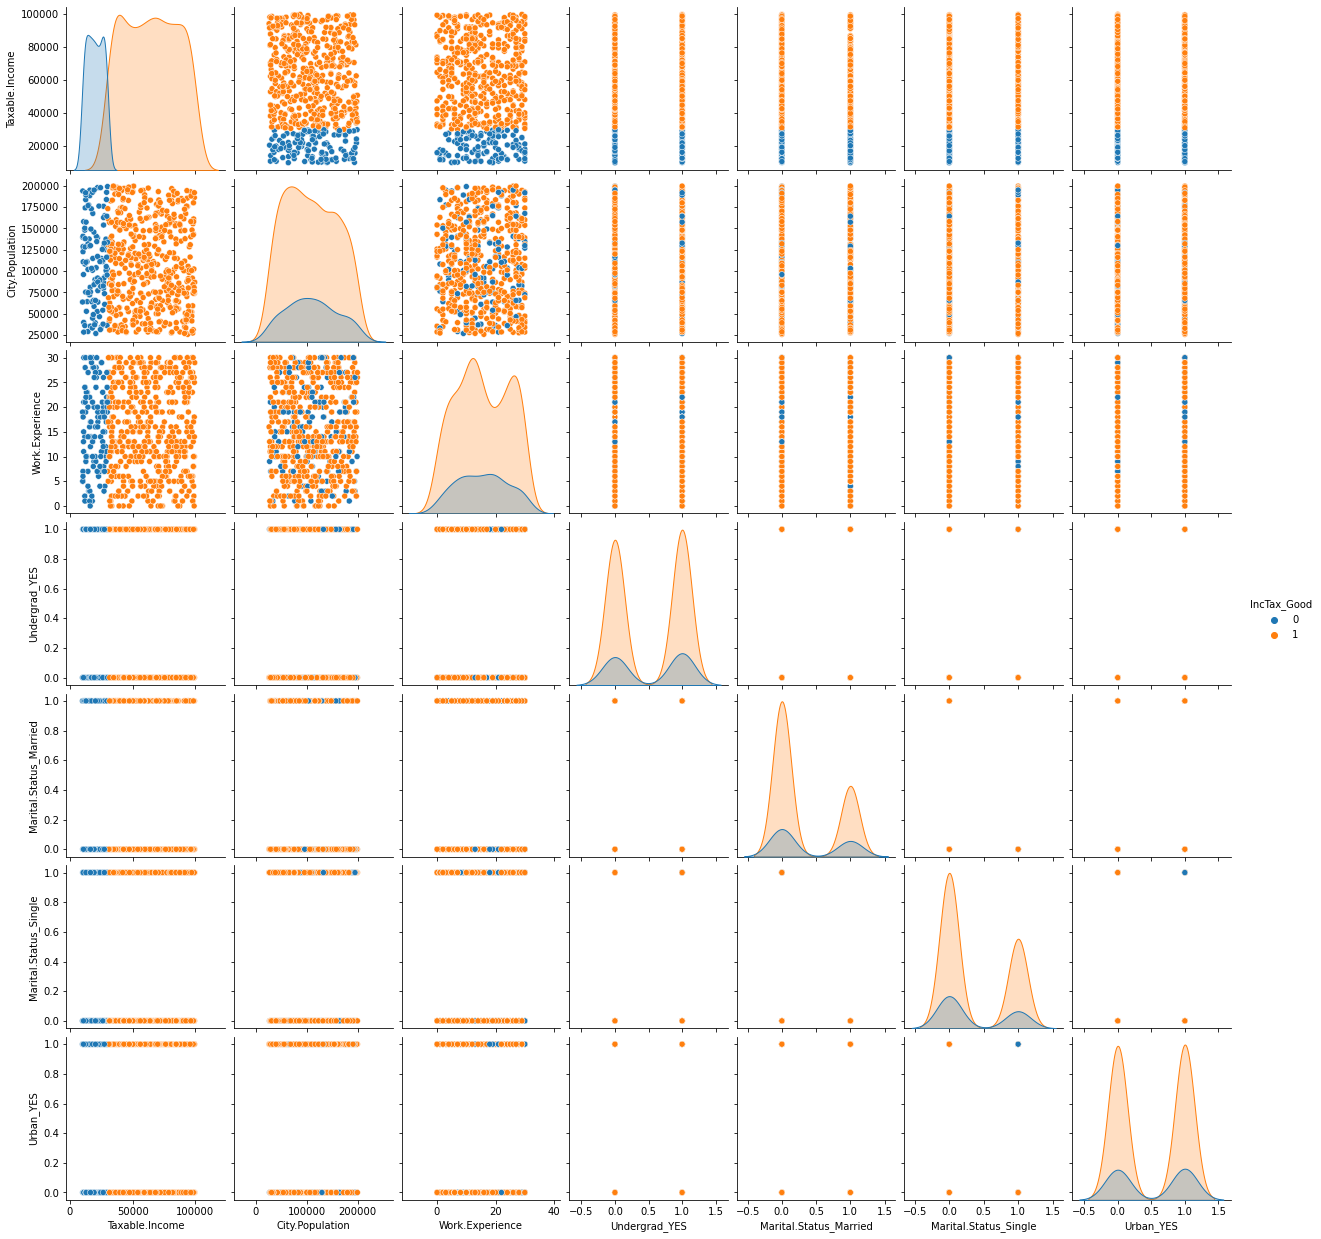

In [11]:
import seaborn as sns
sns.pairplot(data=f_data, hue = 'IncTax_Good')

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized df(considering numerical part of data)
df_norm = norm_func(f_data.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,IncTax_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [14]:
# Declaring features & target
X = df_norm.drop(['IncTax_Good'], axis=1)
y = df_norm['IncTax_Good']

In [15]:
##Converting Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[f_data["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[f_data["Taxable.Income"]<=30000,"income"]="Risky"

In [16]:
##Droping Taxable income variable
f_data.drop(["Taxable.Income"],axis=1,inplace=True)

In [17]:
#LabelEncoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in f_data.columns:
    if f_data[column_name].dtype == object:
        f_data[column_name] = le.fit_transform(f_data[column_name])
    else:
        pass

In [18]:
##Splitting data into featuers and labels
features = f_data.iloc[:,0:5]
labels = f_data.iloc[:,5]

In [19]:
#Collecting Column names
features = f_data.iloc[:,0:5]
labels = f_data.iloc[:,5]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

# Building Decision Tree Classifier using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
from sklearn import tree

[Text(0.5, 0.875, 'X[1] <= 5.5\nentropy = 1.0\nsamples = 480\nvalue = [238, 242]'),
 Text(0.25, 0.625, 'X[1] <= 0.5\nentropy = 0.939\nsamples = 76\nvalue = [27, 49]'),
 Text(0.125, 0.375, 'X[0] <= 105290.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.375, 0.375, 'X[1] <= 2.5\nentropy = 0.965\nsamples = 64\nvalue = [25, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.99\nsamples = 25\nvalue = [14, 11]'),
 Text(0.4375, 0.125, 'entropy = 0.858\nsamples = 39\nvalue = [11, 28]'),
 Text(0.75, 0.625, 'X[0] <= 98165.0\nentropy = 0.999\nsamples = 404\nvalue = [211, 193]'),
 Text(0.625, 0.375, 'X[0] <= 92684.0\nentropy = 0.994\nsamples = 178\nvalue = [81, 97]'),
 Text(0.5625, 0.125, 'entropy = 0.999\nsamples = 167\nvalue = [80, 87]'),
 Text(0.6875, 0.125, 'entropy = 0.439\nsamples = 11\nvalue = [1, 10]'),
 Text(0.875, 0.375, 'X[0] <= 100673.5\nentropy = 

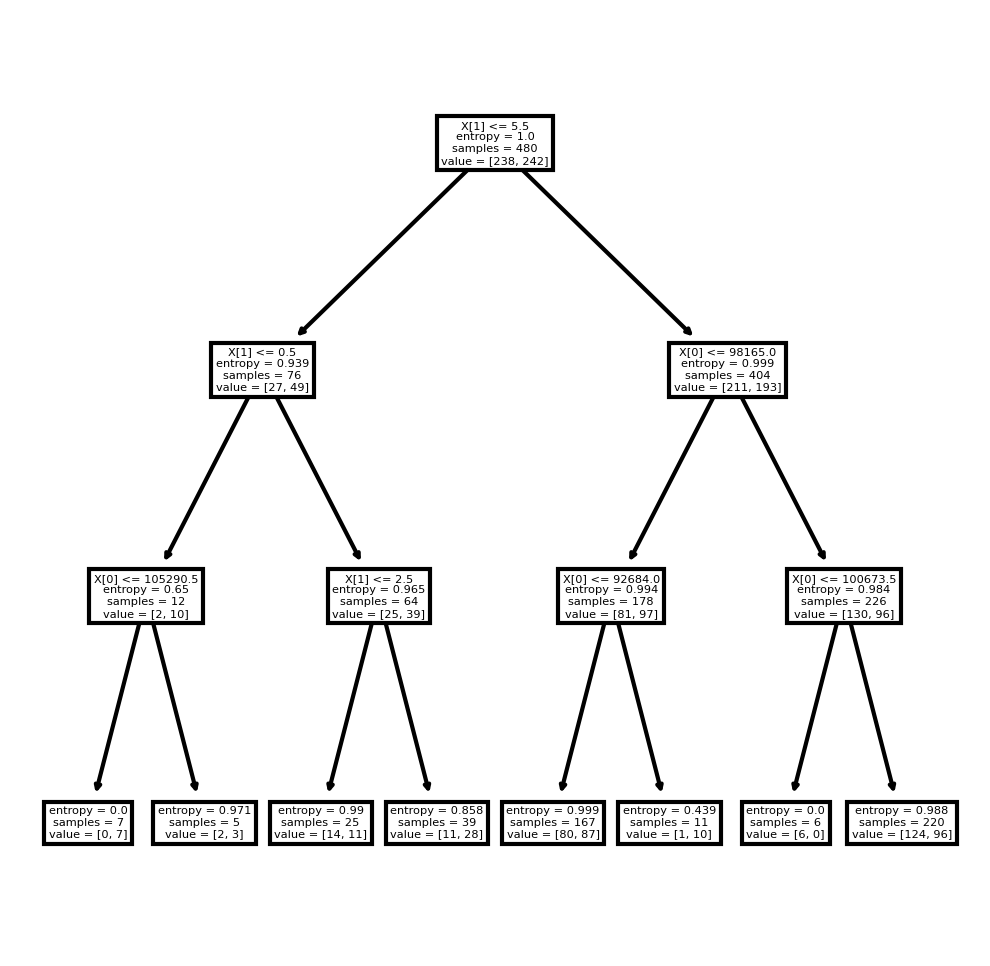

In [23]:
#Plotting decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)

In [24]:
colnames = list(f_data.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'IncTax_Good']

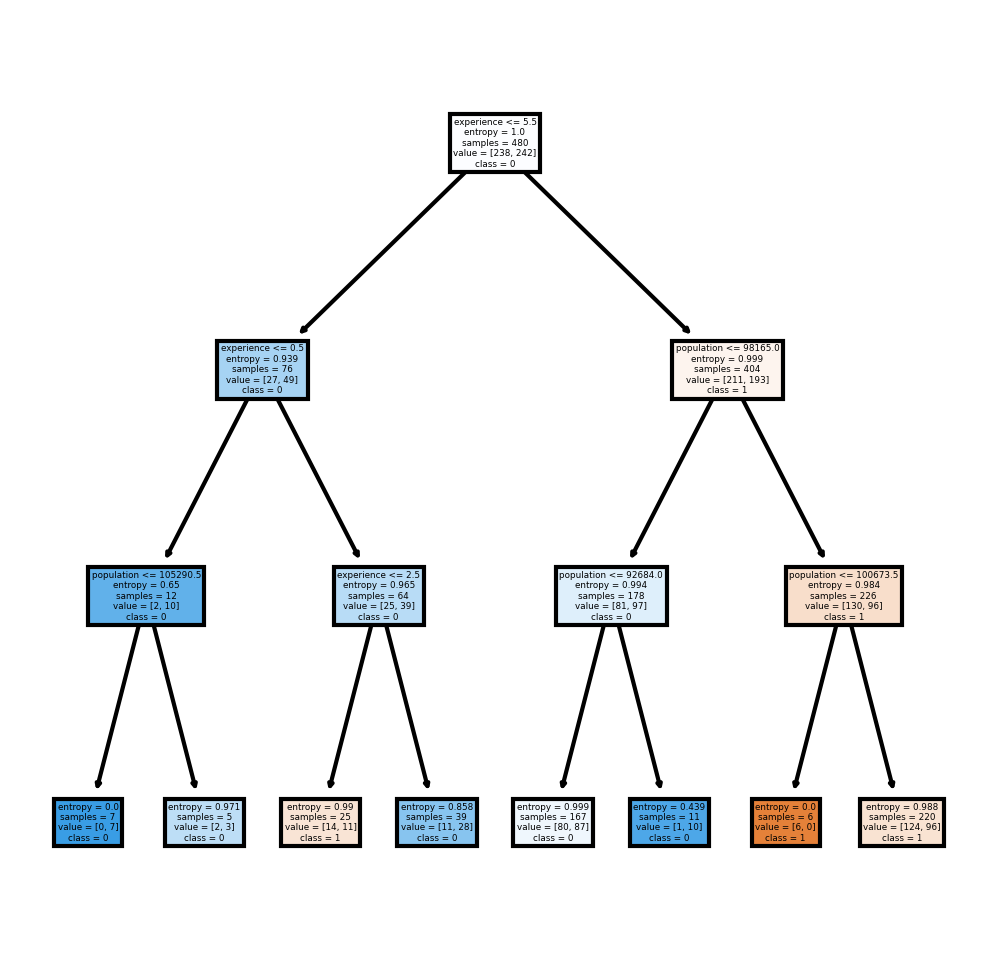

In [25]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
#Predicting on test data
preds = model.predict(x_test)  
pd.Series(preds).value_counts() 

1    62
0    58
dtype: int64

In [27]:
preds

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [28]:
#2way table to understand correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1
Urban_YES,,
0,31,29
1,27,33


In [29]:
# Accuracy 
np.mean(preds==y_test)

0.5333333333333333

# Building Decision Tree Classifier using Gini Criteria

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5333333333333333